From: Shilpi | Edited: Mohamed

In [75]:
import warnings
warnings.filterwarnings('ignore')
from sunpy.net import Fido, attrs as a
from stixpy.net.client import STIXClient  # This registers the STIX client with Fido
from datetime import datetime, timedelta
from sunpy.timeseries import TimeSeries
from stixpy.timeseries import quicklook
import matplotlib.pyplot as plt
import pylab
from matplotlib import dates
import astropy.units as u
import numpy as np
import pandas as pd
from astropy.io import fits

In [67]:
start_time = '2025-03-25T12:21:00'
end_time   = '2025-03-25T13:12:00'

ql_query = Fido.search(a.Time(start_time, end_time),
                       a.Instrument.stix, a.stix.DataProduct.ql_lightcurve)
display(ql_query)

Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,Request ID
Time,Time,str4,str2,str2,str13,str3,str1
2025-03-25 00:00:00.000,2025-03-25 23:59:59.999,STIX,L1,QL,ql-lightcurve,V02,-


In [68]:
ql_files = Fido.fetch(ql_query)
display(ql_files)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

['/home/mnedal/sunpy/data/solo_L1_stix-ql-lightcurve_20250325_V02.fits']

In [69]:
files = fits.open(ql_files[0])
ql_lightcurves = TimeSeries(ql_files)

In [77]:
pd.Timestamp(start_time)-timedelta(minutes=21)

Timestamp('2025-03-25 12:00:00')

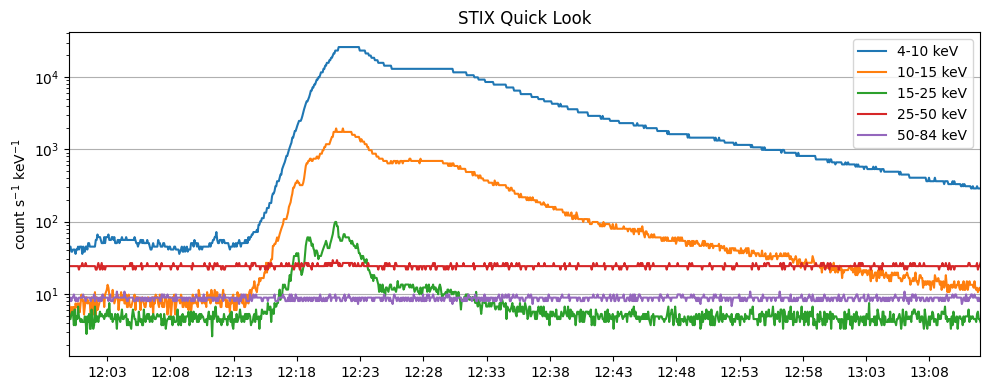

In [78]:
fig = plt.figure(figsize=[10,4])
ax  = fig.add_subplot(111)
ql_lightcurves.plot(axes=ax)
# ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
ax.set_xlim(left=pd.Timestamp(start_time)-timedelta(minutes=21), right=end_time)
ax.xaxis.set_major_locator(dates.MinuteLocator(interval=5))
ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
plt.setp(ax.get_xticklabels(), rotation=0)
for label in ax.get_xticklabels():
    label.set_horizontalalignment('center')
fig.tight_layout()
plt.show()

In [91]:
type(ql_lightcurves.time)

astropy.time.core.Time

In [92]:
ql_lightcurves.time

<Time object: scale='utc' format='iso' value=['2025-03-25 00:00:01.983' '2025-03-25 00:00:05.983'
 '2025-03-25 00:00:09.983' ... '2025-03-25 23:59:49.783'
 '2025-03-25 23:59:53.783' '2025-03-25 23:59:57.783']>

In [24]:
# do timedelay correction and convert to datetime objects
df = ql_lightcurves.to_dataframe()
crrct_times = ql_lightcurves.time + (files[0].header['EAR_TDEL'])*u.s
times = crrct_times.datetime

In [30]:
df.head()

,control_index,timedel,triggers,triggers_comp_err,rcr,4-10 keV,10-15 keV,15-25 keV,25-50 keV,50-84 keV,4-10 keV_comp_err,10-15 keV_comp_err,15-25 keV_comp_err,25-50 keV_comp_err,50-84 keV_comp_err
time,,,,,,,,,,,,,,,
2025-03-25 00:00:01.983,0,400,2175,73.901962,0,41.166877,8.200042,3.700019,26.840137,7.970629,4.636809,1.224745,1.224745,18.479719,9.246621
2025-03-25 00:00:05.983,0,400,2687,73.901962,0,38.500242,6.600042,3.700023,24.280153,8.911821,4.636809,1.224745,1.224745,18.479719,9.246621
2025-03-25 00:00:09.983,0,400,2431,73.901962,0,38.500219,8.200047,4.900028,24.280138,9.852997,4.636809,1.224745,1.224745,18.479719,9.246621
2025-03-25 00:00:13.983,0,400,2431,73.901962,0,38.500219,6.600038,4.500026,24.280138,7.970634,4.636809,1.224745,1.224745,18.479719,9.246621
2025-03-25 00:00:17.983,0,400,2175,73.901962,0,38.500196,7.400038,5.300027,24.280124,8.911810,4.636809,1.224745,1.224745,18.479719,9.246621


In [32]:
df_filtered = df.filter(items=['4-10 keV','10-15 keV','15-25 keV','25-50 keV','50-84 keV'])
df_filtered.head()

,4-10 keV,10-15 keV,15-25 keV,25-50 keV,50-84 keV
time,,,,,
2025-03-25 00:00:01.983,41.166877,8.200042,3.700019,26.840137,7.970629
2025-03-25 00:00:05.983,38.500242,6.600042,3.700023,24.280153,8.911821
2025-03-25 00:00:09.983,38.500219,8.200047,4.900028,24.280138,9.852997
2025-03-25 00:00:13.983,38.500219,6.600038,4.500026,24.280138,7.970634
2025-03-25 00:00:17.983,38.500196,7.400038,5.300027,24.280124,8.911810


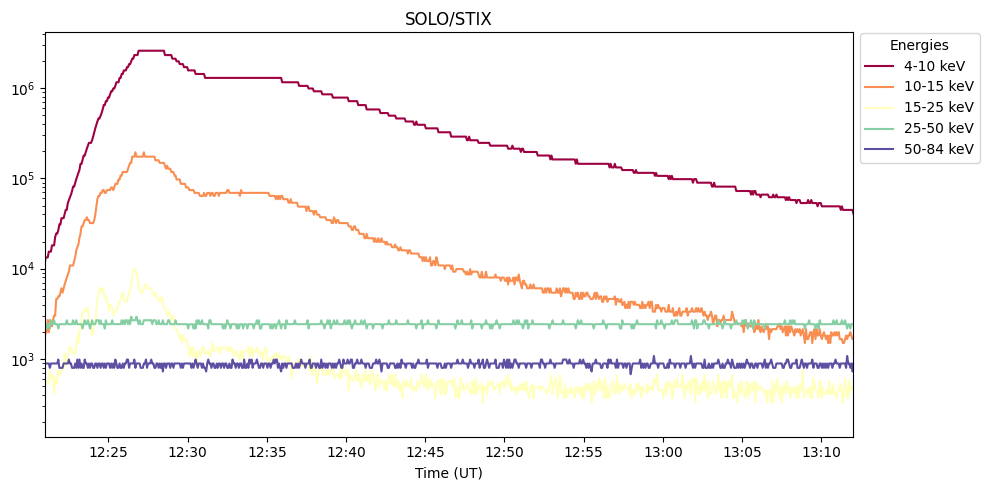

In [89]:
fig = plt.figure(figsize=[10,5])
ax  = fig.add_subplot(111)

cmap        = plt.cm.get_cmap('Spectral') # Spectral, Blues
num_lines   = len(df_filtered.columns)
colors_list = cmap(np.linspace(0, 1, num_lines))

for i, col in enumerate(df_filtered.columns):
    ax.plot(times, df_filtered[col]*100, color=colors_list[i], label=col)

ax.set_yscale('log')
ax.set_xlabel('Time (UT)')
ax.set_title(ql_lightcurves.meta.metas[0]['telescop'])
ax.legend(bbox_to_anchor=(1, 0.66), title='Energies')
ax.set_xlim(left=start_time, right=end_time)
ax.xaxis.set_major_locator(dates.MinuteLocator(interval=5))
ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
fig.tight_layout()
plt.show()

In [3]:
# # Example
# ql_query = Fido.search(a.Time('2025-03-26T09:00', '2025-03-26T10:30'), a.Instrument.stix,
#                     a.stix.DataProduct.ql_lightcurve)

# ql_files = Fido.fetch(ql_query)
# files = fits.open(ql_files[0])
# ql_lightcurves = TimeSeries(ql_files)
# ### let's do timedelay correction and convert to datetime objects
# #pdb.set_trace()
# df = ql_lightcurves.to_dataframe()
# crrct_times = ql_lightcurves.time+(files[0].header['EAR_TDEL'])*u.s
# times = crrct_times.datetime

# fig = plt.figure(figsize=(12, 7))
# ax = fig.add_subplot(111)
# color = 'Reds'
# cm = pylab.get_cmap(color)
# collist = cm(np.linspace(0, 255, 6).astype(int))
# #ql_lightcurves.plot(axes = ax)
# ax.plot(times,df['50-84 keV']*100,color = collist[4])
# ax.plot(times,df['25-50 keV']*100,color = collist[3])
# ax.plot(times,df['15-25 keV']*100,color = collist[2])
# ax.plot(times,df['10-15 keV']*100,color = collist[1])
# ax.plot(times,df['4-10 keV']*100,color = collist[0])

# ax.set_yscale('log')
# ax.set_xlim(datetime(2025, 3, 26, 9, 00), datetime(2025, 3, 26, 9, 50))
# ax.xaxis.set_major_locator(dates.MinuteLocator(interval=5))
# ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M:%S'))
# plt.show()

In [ ]:
from sunpy.net import Fido, attrs as a
from stixpy.net.client import STIXClient  # This registers the STIX client with Fido
from datetime import datetime
from sunpy.timeseries import TimeSeries
from stixpy.timeseries import quicklook
import pdb, pylab
import matplotlib.pyplot as plt
from matplotlib import dates
import astropy.units as u
import numpy as np
from astropy.io import fits

ql_query = Fido.search(a.Time('2025-03-25T12:00', '2025-03-25T13:10'), a.Instrument.stix,
                    a.stix.DataProduct.ql_lightcurve)

ql_files = Fido.fetch(ql_query)
files = fits.open(ql_files[0])
ql_lightcurves = TimeSeries(ql_files)
### let's do timedelay correction and convert to datetime objects
#pdb.set_trace()
df = ql_lightcurves.to_dataframe()
crrct_times = ql_lightcurves.time+(files[0].header['EAR_TDEL'])*u.s
times = crrct_times.datetime

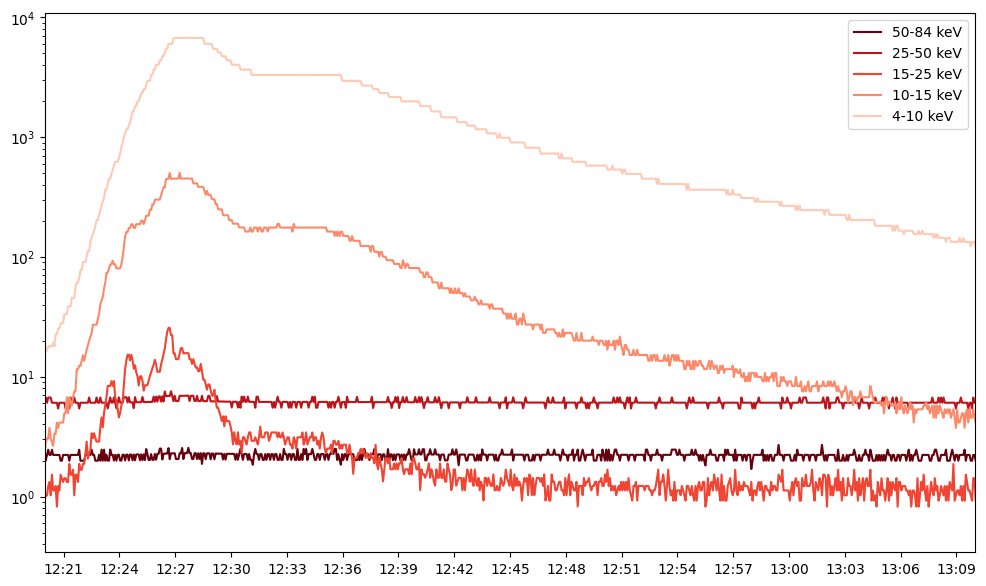

In [2]:
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111)
color = 'Reds'
cm = pylab.get_cmap(color)
collist = cm(np.linspace(0, 255, 6).astype(int))
#ql_lightcurves.plot(axes = ax)
ax.plot(times,df['50-84 keV'],color = collist[5],label = '50-84 keV')
ax.plot(times,df['25-50 keV'],color = collist[4],label = '25-50 keV')
ax.plot(times,df['15-25 keV'],color = collist[3],label = '15-25 keV')
ax.plot(times,df['10-15 keV'],color = collist[2],label = '10-15 keV')
ax.plot(times,df['4-10 keV'],color = collist[1],label = '4-10 keV')

ax.set_yscale('log')
ax.legend(loc = 'upper right')
ax.set_xlim(datetime(2025, 3, 25, 12, 20), datetime(2025, 3, 25, 13,10))
ax.xaxis.set_major_locator(dates.MinuteLocator(interval=3))
ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
plt.show()

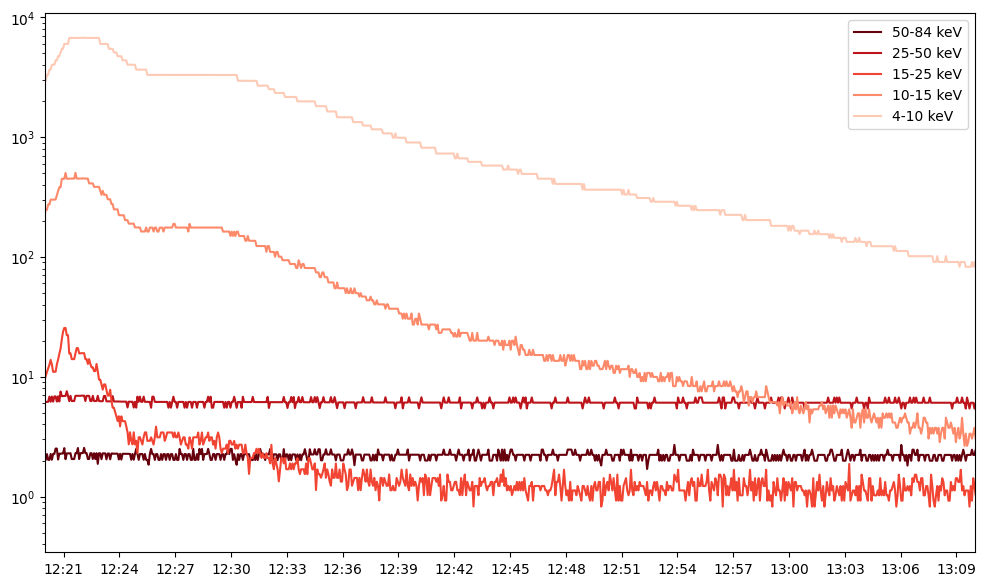

In [5]:
# before the time delay shifting
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111)
color = 'Reds'
cm = pylab.get_cmap(color)
collist = cm(np.linspace(0, 255, 6).astype(int))
#ql_lightcurves.plot(axes = ax)
ax.plot(df.index,df['50-84 keV'],color = collist[5],label = '50-84 keV')
ax.plot(df.index,df['25-50 keV'],color = collist[4],label = '25-50 keV')
ax.plot(df.index,df['15-25 keV'],color = collist[3],label = '15-25 keV')
ax.plot(df.index,df['10-15 keV'],color = collist[2],label = '10-15 keV')
ax.plot(df.index,df['4-10 keV'],color = collist[1],label = '4-10 keV')

ax.set_yscale('log')
ax.legend(loc = 'upper right')
ax.set_xlim(datetime(2025, 3, 25, 12, 20), datetime(2025, 3, 25, 13,10))
ax.xaxis.set_major_locator(dates.MinuteLocator(interval=3))
ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
plt.show()